In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay






In [7]:
print("\n==============================")
print(" TASK 1: STUDENT PASS/FAIL PREDICTION")
print("==============================")


print("\n I am Loading the dataset into a dataframe...")

SutudentData = pd.read_csv('Student_performance_data _.csv')
print(SutudentData.head().to_string())
print("\n")
print(SutudentData.info())
print("\n")
print(SutudentData.shape)
print("\n")
print("Data Shape:", SutudentData.shape)
print("\nData Types:\n", SutudentData.dtypes)
print("\nMissing Values:\n", SutudentData.isnull().sum())
print("\nSummary Statistics Of Data:\n", SutudentData.describe(include='all'))




 TASK 1: STUDENT PASS/FAIL PREDICTION

 I am Loading the dataset into a dataframe...
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering       GPA  GradeClass
0       1001   17       1          0                  2        19.833723         7         1                2                0       0      1             0  2.929196         2.0
1       1002   18       0          0                  1        15.408756         0         0                1                0       0      0             0  3.042915         1.0
2       1003   15       0          2                  3         4.210570        26         0                2                0       0      0             0  0.112602         4.0
3       1004   17       1          0                  3        10.028829        14         0                3                1       0      0             0  2.054218         3.0
4       1005   17       

In [8]:
print("\n I am Exploring the datasets structure and basic information...")
print("\n Information about columns and datatypes and etc: \n")

DuplicateRowsum = SutudentData.duplicated().sum()
print("Number of duplicated rows: ",DuplicateRowsum )
print("The Duplicated Rows are: \n", SutudentData[SutudentData.duplicated()])
print("\n")
database_withDuplicatedRowsGone = SutudentData.drop_duplicates()
print("The Database Without the Duplicaed Rows Here \n ", database_withDuplicatedRowsGone.head().to_string())
print("\n")

Partial_Duplicates_Rows_Count = SutudentData.duplicated(keep=False).sum()
print("The No of Partial Duplicates Rows are: ", Partial_Duplicates_Rows_Count)
print("\n")
SutudentData_no_partial_duplicates = SutudentData.drop_duplicates(keep='first')
print(SutudentData_no_partial_duplicates.head().to_string())






 I am Exploring the datasets structure and basic information...

 Information about columns and datatypes and etc: 

Number of duplicated rows:  0
The Duplicated Rows are: 
 Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


The Database Without the Duplicaed Rows Here 
     StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering       GPA  GradeClass
0       1001   17       1          0                  2        19.833723         7         1                2                0       0      1             0  2.929196         2.0
1       1002   18       0          0                  1        15.408756         0         0                1                0       0      0             0  3.042915         1.0
2       1003   15       0         

In [9]:
print("Missing Values in each Column: \n", SutudentData.isnull().sum())
print("\n")
print("Percentage of Missing Values in each Column: \n", (SutudentData.isnull().mean()*100))

Missing_Values_Coloums_Dataframe = pd.DataFrame({
    'Missing_Values_Coloums': SutudentData.isnull().any(),
    'Missing_Values_Count': SutudentData.isnull().sum(),
    'Missing_ValuesIn_Percentage': (SutudentData.isnull().sum() / len(SutudentData)) * 100
})

print(Missing_Values_Coloums_Dataframe.to_string())

Missing Values in each Column: 
 StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


Percentage of Missing Values in each Column: 
 StudentID            0.0
Age                  0.0
Gender               0.0
Ethnicity            0.0
ParentalEducation    0.0
StudyTimeWeekly      0.0
Absences             0.0
Tutoring             0.0
ParentalSupport      0.0
Extracurricular      0.0
Sports               0.0
Music                0.0
Volunteering         0.0
GPA                  0.0
GradeClass           0.0
dtype: float64
                   Missing_Values_Coloums  Missing_Values_Count  Missing_ValuesIn_Percentage
StudentID                           False                     0              

In [10]:
def Imputation_Of_Values(database):
    for column in database.columns:
        if np.issubdtype(database[column].dtype, np.number):
            median_value = database[column].median()
            database[column] = database[column].fillna(median_value)
            print(f"Filled NaN in numeric column '{column}' with Median = {median_value}")
        
        elif database[column].dtype == 'object':
            mode_value = database[column].mode()[0]
            database[column] = database[column].fillna(mode_value)
            print(f"Filled NaN in categorical column '{column}' with Mode = {mode_value}")
        
        elif np.issubdtype(database[column].dtype, np.datetime64):
            database[column] = database[column].interpolate(method='time')
            print(f"Interpolated missing datetime values in '{column}'")
    
    return database

Database_After_Imputation = Imputation_Of_Values(SutudentData)
print("The Database After Imputation of Missing Values is : \n", Database_After_Imputation.head().to_string())


print("\n\n Statistical Explanation Defined Here : \n\n")
print(Database_After_Imputation.describe())

Filled NaN in numeric column 'StudentID' with Median = 2196.5
Filled NaN in numeric column 'Age' with Median = 16.0
Filled NaN in numeric column 'Gender' with Median = 1.0
Filled NaN in numeric column 'Ethnicity' with Median = 0.0
Filled NaN in numeric column 'ParentalEducation' with Median = 2.0
Filled NaN in numeric column 'StudyTimeWeekly' with Median = 9.705363212574394
Filled NaN in numeric column 'Absences' with Median = 15.0
Filled NaN in numeric column 'Tutoring' with Median = 0.0
Filled NaN in numeric column 'ParentalSupport' with Median = 2.0
Filled NaN in numeric column 'Extracurricular' with Median = 0.0
Filled NaN in numeric column 'Sports' with Median = 0.0
Filled NaN in numeric column 'Music' with Median = 0.0
Filled NaN in numeric column 'Volunteering' with Median = 0.0
Filled NaN in numeric column 'GPA' with Median = 1.8933926937866847
Filled NaN in numeric column 'GradeClass' with Median = 4.0
The Database After Imputation of Missing Values is : 
    StudentID  Age  G

In [11]:
# -----------------------------------------------
print("\n I am Now Creating a binary target column 'Pass' based on GPA values...")
Database_After_Imputation['Pass'] = np.where(Database_After_Imputation['GPA'] >= 2.0, 1, 0)
print("New column 'Pass' created successfully (1 = Pass, 0 = Fail).")

print("\n I have Calculating attendance percentage from absences assuming 30 total classes...")
Database_After_Imputation['Attendance'] = 100 - (Database_After_Imputation['Absences'] / 30 * 100)
Database_After_Imputation['Attendance'] = Database_After_Imputation['Attendance'].clip(lower=0)
print("Attendance column added successfully!\n")

print(Database_After_Imputation[['StudyTimeWeekly', 'Absences', 'Attendance', 'GPA', 'Pass']].head())





 I am Now Creating a binary target column 'Pass' based on GPA values...
New column 'Pass' created successfully (1 = Pass, 0 = Fail).

 I have Calculating attendance percentage from absences assuming 30 total classes...
Attendance column added successfully!

   StudyTimeWeekly  Absences  Attendance       GPA  Pass
0        19.833723         7   76.666667  2.929196     1
1        15.408756         0  100.000000  3.042915     1
2         4.210570        26   13.333333  0.112602     0
3        10.028829        14   53.333333  2.054218     1
4         4.672495        17   43.333333  1.288061     0



 Now we are Visualizing relationships between study time, attendance, and pass/fail outcomes...


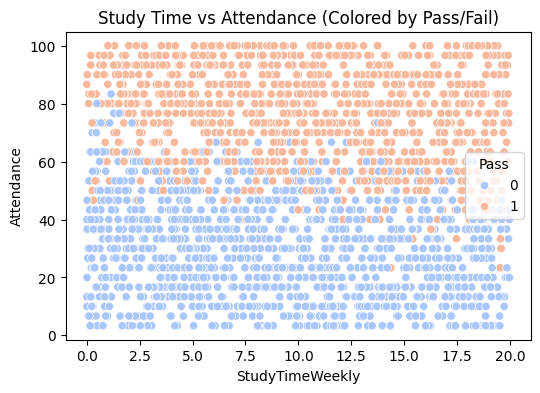

C:\Users\Vijay Pranav\AppData\Local\Temp\ipykernel_14988\4164635227.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pass', data=Database_After_Imputation, palette='Set2')


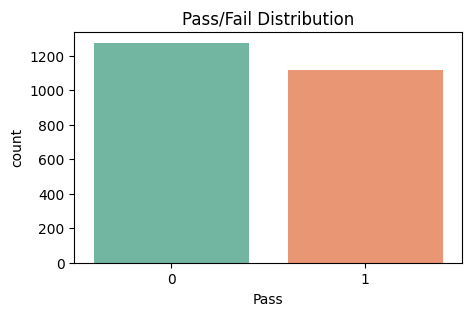


Visualizations displayed successfully!


In [12]:

print("\n Now we are Visualizing relationships between study time, attendance, and pass/fail outcomes...")

plt.figure(figsize=(6,4))
sns.scatterplot(x='StudyTimeWeekly', y='Attendance', hue='Pass', data=Database_After_Imputation, palette='coolwarm')
plt.title('Study Time vs Attendance (Colored by Pass/Fail)')
plt.show()

plt.figure(figsize=(5,3))
sns.countplot(x='Pass', data=Database_After_Imputation, palette='Set2')
plt.title('Pass/Fail Distribution')
plt.show()

print("\nVisualizations displayed successfully!")



In [13]:

print("\n Selecting important features for model training...")
X = Database_After_Imputation[['StudyTimeWeekly', 'Attendance']]
y = Database_After_Imputation['Pass']
print("Features selected: StudyTimeWeekly and Attendance")
print("Target variable: Pass")

print("\nSplitting dataset into training and testing sets (80-20 split)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")




 Selecting important features for model training...
Features selected: StudyTimeWeekly and Attendance
Target variable: Pass

Splitting dataset into training and testing sets (80-20 split)...
Training samples: 1913, Testing samples: 479


In [14]:

print("\n Training Logistic Regression model on training data...")
model = LogisticRegression()
model.fit(X_train, y_train)
print("Model trained successfully!")




 Training Logistic Regression model on training data...
Model trained successfully!



 At Last I am  Evaluating model performance on the test set...

 Model Accuracy: 90.81%

Confusion Matrix:
 [[228  21]
 [ 23 207]]


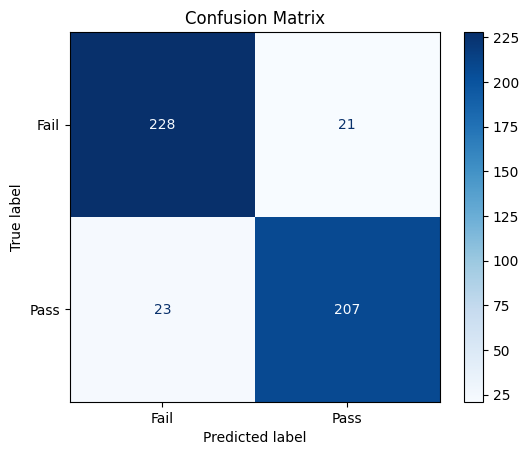

In [15]:

print("\n At Last I am  Evaluating model performance on the test set...")
y_pred = model.predict(X_test)

ModelAccury = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\n Model Accuracy: {ModelAccury*100:.2f}%")
print("\nConfusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()




 Analyzing which features have the most impact on prediction...

Feature Importance (Model Coefficients):

           Feature  Coefficient
0  StudyTimeWeekly     0.195531
1       Attendance     0.183271


C:\Users\Vijay Pranav\AppData\Local\Temp\ipykernel_14988\245561988.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Coefficient', data=coef_Database_After_Imputation, palette='viridis')


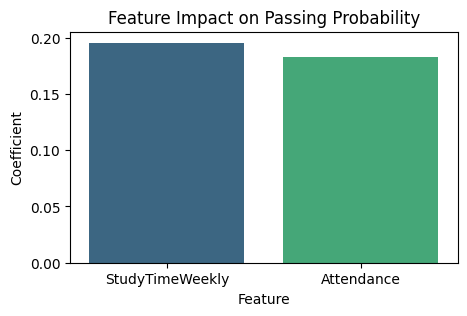


Positive coefficients indicate features that increase the likelihood of passing,
while negative coefficients indicate features that decrease it.

 Task 1 completed successfully!


In [16]:

print("\n Analyzing which features have the most impact on prediction...")
coef_Database_After_Imputation = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

print("\nFeature Importance (Model Coefficients):\n")
print(coef_Database_After_Imputation)

plt.figure(figsize=(5,3))
sns.barplot(x='Feature', y='Coefficient', data=coef_Database_After_Imputation, palette='viridis')
plt.title("Feature Impact on Passing Probability")
plt.show()

print("\nPositive coefficients indicate features that increase the likelihood of passing,")
print("while negative coefficients indicate features that decrease it.")
print("\n Task 1 completed successfully!")